# Consumer Complaint Resolution Analysis Using Python

# Step 1 : Importing Required Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Step 2 : Reading Data From Excel Files

In [2]:
train_data = pd.read_csv('C:\\Users\\utkar\\OneDrive\\Desktop\\Datasets\\Consumer_Complaints_train.csv')
test_data = pd.read_csv('C:\\Users\\utkar\\OneDrive\\Desktop\\Datasets\\Consumer_Complaints_test.csv')

# Step 3 : Checking The Data Types & Printing The Column Names

In [3]:
print("Train Data Types:")
print(train_data.dtypes)
print("\nTest Data Types:")
print(test_data.dtypes)

# Print column names for train_data
print("Column Names in train_data:")
print(train_data.columns)

# Print column names for test_data
print("\nColumn Names in test_data:")
print(test_data.columns)

Train Data Types:
Date_received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer_complaint_narrative    object
Company_public_response         object
Company                         object
State                           object
ZIP_code                        object
Tags                            object
Consumer_consent_provided?      object
Submitted_via                   object
Date_sent_to_company            object
Company_response_to_consumer    object
Timely_response?                object
Consumer_disputed?              object
Complaint_ID                     int64
dtype: object

Test Data Types:
Date received                   object
Product                         object
Sub-product                     object
Issue                           object
Sub-issue                       object
Consumer_complaint_narrative    object
Company_public

# Step 4 : Missing value analysis and drop columns with more than 25% missing data

In [4]:
missing_threshold = 0.25
train_data = train_data.dropna(thresh=len(train_data) * (1 - missing_threshold), axis=1)
test_data = test_data.dropna(thresh=len(test_data) * (1 - missing_threshold), axis=1)

# Step 5 : Extract Day, Month, and Year from Date Received Column

In [5]:
train_data['Date_received'] = pd.to_datetime(train_data['Date_received'])
test_data['Date received'] = pd.to_datetime(test_data['Date received'])

train_data['Year_Received'] = train_data['Date_received'].dt.year
train_data['Month_Received'] = train_data['Date_received'].dt.month
train_data['Day_Received'] = train_data['Date_received'].dt.day

C:\Users\utkar\AppData\Local\Temp\ipykernel_196\904093742.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date_received'] = pd.to_datetime(train_data['Date_received'])
C:\Users\utkar\AppData\Local\Temp\ipykernel_196\904093742.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  test_data['Date received'] = pd.to_datetime(test_data['Date received'])


# Step 6 : Convert 'Date_sent_to_company' to datetime format

In [6]:
train_data['Date_sent_to_company'] = pd.to_datetime(train_data['Date_sent_to_company'])

C:\Users\utkar\AppData\Local\Temp\ipykernel_196\1595215666.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_data['Date_sent_to_company'] = pd.to_datetime(train_data['Date_sent_to_company'])


# Step 7 : Calculate Number of Days the Complaint was with the Company

In [7]:
train_data['Days_held'] = (train_data['Date_sent_to_company'] - train_data['Date_received']).dt.days

# Step 8 : Drop unnecessary columns

In [8]:
train_data = train_data.drop(['Date_received', 'Date_sent_to_company', 'ZIP_code', 'Complaint_ID'], axis=1)

# Step 9 : Impute Null value in "State" by Mode

In [9]:
state_mode = train_data['State'].mode()[0]
train_data['State'] = train_data['State'].fillna(state_mode)

# Step 10 : Create a new field 'Week_Received'

In [10]:
train_data['Week_Received'] = train_data['Day_Received'] // 7 + 1

# Step 11 : Store data of disputed people into the "disputed_cons" variable

In [11]:
disputed_cons = train_data[train_data['Consumer_disputed?'] == 'Yes']

# Step 12 : Plot bar graph of total no of disputes

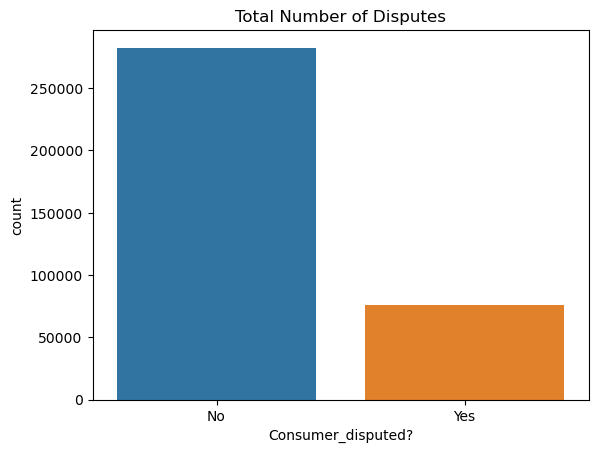

In [12]:
sns.countplot(x='Consumer_disputed?', data=train_data)
plt.title('Total Number of Disputes')
plt.show()

# Step 13 : Plot bar graph of total no of disputes products-wise

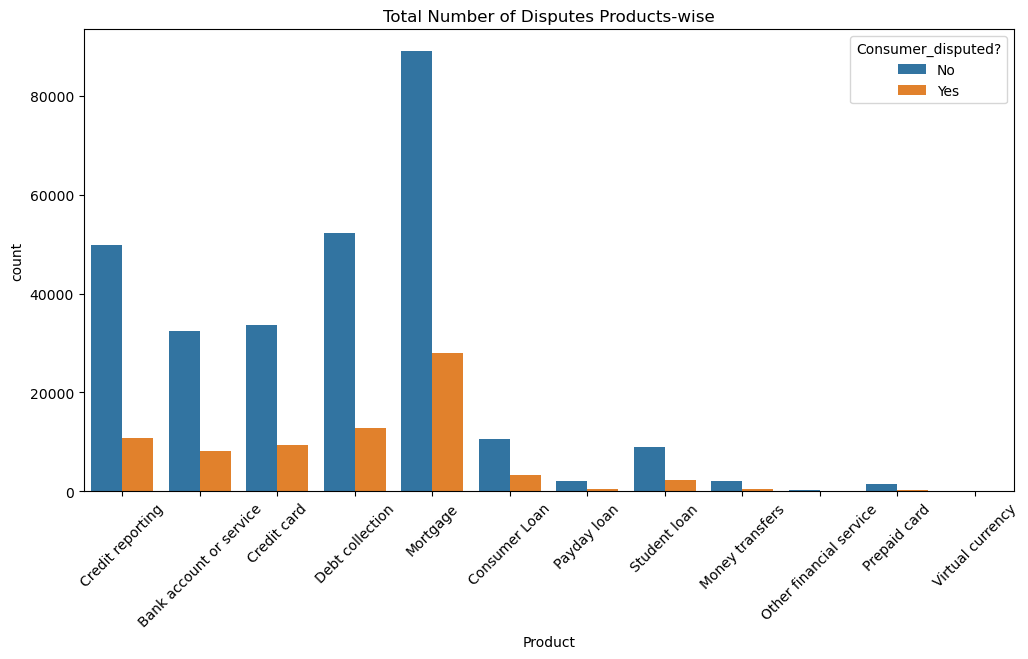

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Product', hue='Consumer_disputed?', data=train_data)
plt.title('Total Number of Disputes Products-wise')
plt.xticks(rotation=45)
plt.show()

# Step 14 : Plot bar graph of total no of disputes where the Company's Response to the Complaints

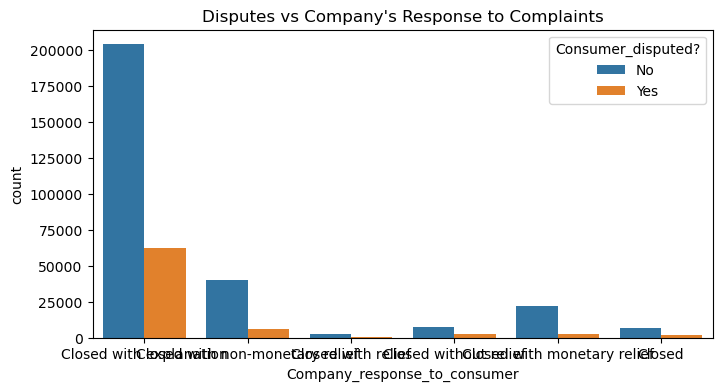

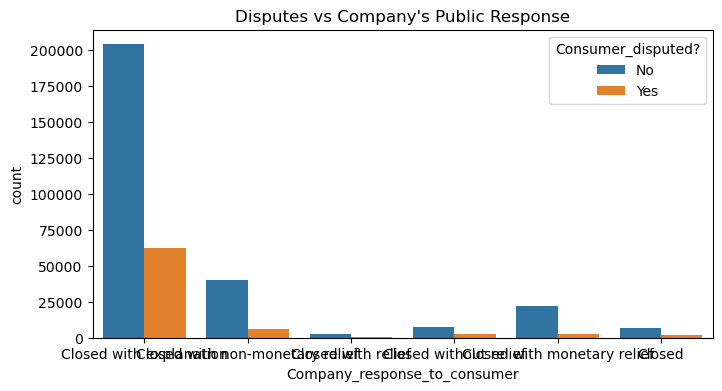

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Company_response_to_consumer', hue='Consumer_disputed?', data=train_data)
plt.title("Disputes vs Company's Response to Complaints")
plt.show()

plt.figure(figsize=(8, 4))
sns.countplot(x='Company_response_to_consumer', hue='Consumer_disputed?', data=train_data)
plt.title("Disputes vs Company's Public Response")
plt.show()

# Step 15 : Plot bar graph of total no of disputes. Whether there are Disputes Instead of Timely Response

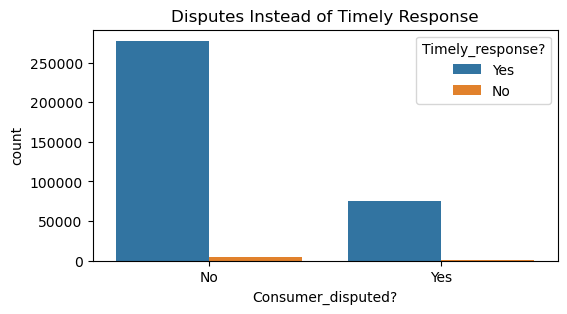

In [15]:
plt.figure(figsize=(6, 3))
sns.countplot(x='Consumer_disputed?', hue='Timely_response?', data=train_data)
plt.title('Disputes Instead of Timely Response')
plt.show()

# Step 16 : Plot bar graph of total no of disputes over Year Wise Complaints

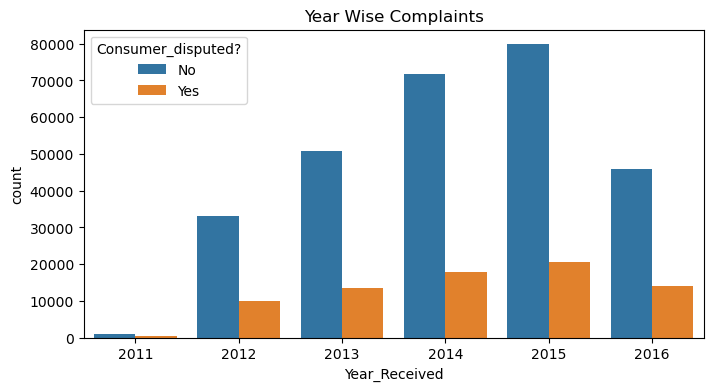

In [16]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Year_Received', hue='Consumer_disputed?', data=train_data)
plt.title('Year Wise Complaints')
plt.show()

# Step 17 : Plot bar graph of total no of disputes over Year Wise Disputes

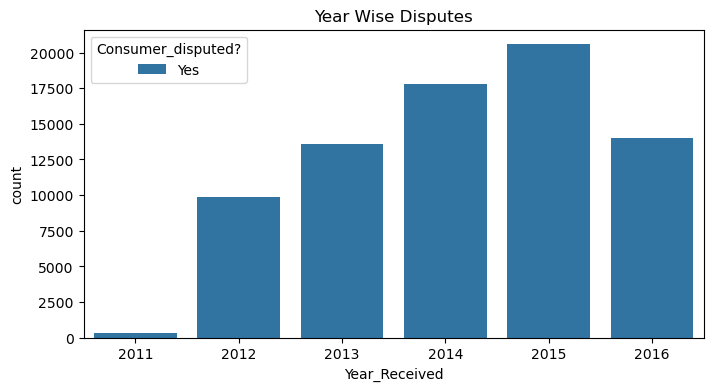

In [17]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Year_Received', hue='Consumer_disputed?', data=disputed_cons)
plt.title('Year Wise Disputes')
plt.show()

# Step 18 : Plot bar graph of Top Companies with Highest Complaints

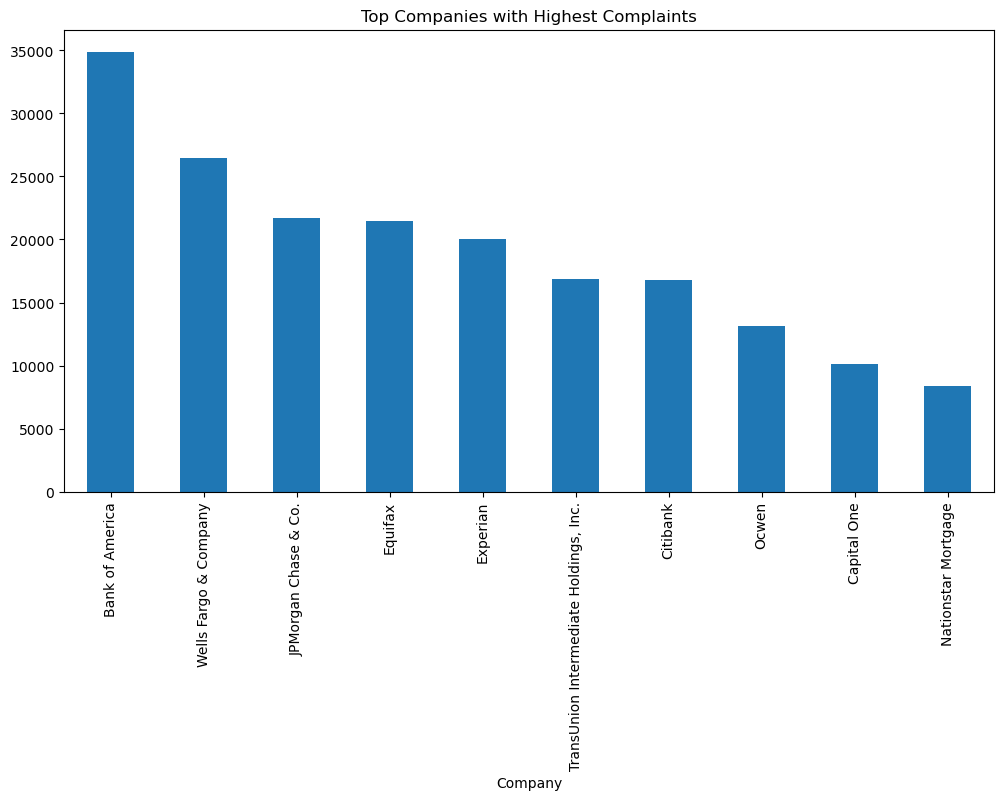

In [18]:
top_companies = train_data.groupby('Company').size().nlargest(10)
plt.figure(figsize=(12, 6))
top_companies.plot(kind='bar')
plt.title('Top Companies with Highest Complaints')
plt.show()

# Step 19 :  Convert all negative days held to zero

In [19]:
train_data['Days_held'] = np.where(train_data['Days_held'] < 0, 0, train_data['Days_held'])

# Step 20 : Drop Unnecessary Columns for Model Building

In [20]:
train_data = train_data.drop(['Company', 'State', 'Year_Received', 'Days_held'], axis=1)

# Step 21 : Change Consumer Disputed Column to 0 and 1

In [21]:
label_encoder = LabelEncoder()
train_data['Consumer_disputed?'] = label_encoder.fit_transform(train_data['Consumer_disputed?'])

# Step 22 : Create Dummy Variables for categorical features

In [22]:
categorical_columns = ['Product', 'Submitted_via', 'Company_response_to_consumer', 'Timely_response?']
train_data = pd.get_dummies(train_data, columns=categorical_columns, drop_first=True)

# Step 23 : Scaling the Data Sets

In [23]:
X = train_data.drop('Consumer_disputed?', axis=1)
y = train_data['Consumer_disputed?']

# Step 24 : One-hot encode categorical features

In [24]:
X = pd.get_dummies(X)

# Step 25 : Standardize the features

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 26 : Make feature selection with the help of PCA up to 80% of the information

In [26]:
pca = PCA(0.8)
X_pca = pca.fit_transform(X_scaled)

# Step 27 : Splitting the Data Sets Into X and Y

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Step 28 : Build and evaluate models

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    print(f'{name} Accuracy: {accuracy}')

Logistic Regression Accuracy: 0.7876174019676152
Decision Tree Accuracy: 0.7544800869540983


# Step 29 : Choose the best model

In [ ]:
best_model = RandomForestClassifier()

# Step 30 : Predict the outcome for the test file and fill its dispute column

In [ ]:
X_test = test_data.drop(['Date received', 'Date_sent_to_company', 'ZIP_code', 'Complaint_ID'], axis=1)
X_test['State'] = X_test['State'].fillna(state_mode)

X_test['Week_Received'] = (X_test['Date_received'].dt.day - 1) // 7 + 1

X_test_scaled = scaler.transform(X_test)
X_test_pca = pca.transform(X_test_scaled)

test_data['Consumer_disputed?'] = best_model.predict(X_test_pca)

# Step 31 : Save the output

In [ ]:
test_data.to_csv('C:\\Users\\utkar\\OneDrive\\Desktop\\Datasets\\Consumer_Complaints_test_with_predictions.csv', index=False)